In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [3]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Load Boston dataset from skit-learn
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# Print the properties of Boston Dataset
print(dir(boston))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']


In [5]:
# Convert Numpy array to Pandas Data Frame
dataset = pd.DataFrame(boston.data)
# Add Column Names in the Dataset
dataset.columns = boston.feature_names
print(dataset.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.1

In [6]:
# Target value MEDV / Price is missing from the dataset.
# Create a new column MEDV in the dataset and add target values.
dataset['MEDV'] = boston.target
print(dataset.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396

In [7]:
# Shape of the dataset
print("Dataset Shape is: ", dataset.shape)

Dataset Shape is:  (506, 14)


In [8]:
# Compute and display summary statistics
print("Summary Statistics")
print(dataset.describe())

Summary Statistics
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     

In [9]:
# Create Datasets for Target and Predictors
# Target value Y and Predictor values X. Thus, Y = Price, X = RM & LSTAT features
# Create dataset with RM and LSTAT
X = pd.DataFrame(np.c_[dataset['LSTAT'], dataset['RM']], columns = ['LSTAT','RM'])
Y = dataset['MEDV'] # Create dataset with MEDV

In [10]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print("X Train: ", X_train.shape)
print("Y Train: ", Y_train.shape)
print("X Test: ", X_test.shape)
print("Y Test: ", Y_test.shape)

X Train:  (404, 2)
Y Train:  (404,)
X Test:  (102, 2)
Y Test:  (102,)


In [11]:
# Linear Rigression
# Split the dataset into train and test
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test) # Prediction

# Create Dataset with Testing values and Predicted Prices
print("Linear Regression Model")
model_lr = pd.DataFrame(X_test)
model_lr['MEDV'] = Y_test
model_lr['Predicted MEDV'] = Y_pred
print(model_lr.head(10))

Linear Regression Model
     LSTAT     RM  MEDV  Predicted MEDV
329   7.34  6.333  22.6       26.285878
371   9.53  6.216  50.0       24.253779
219  10.50  6.373  23.0       24.420602
403  19.77  5.349   8.3       13.117541
78   12.34  6.232  21.2       22.495118
15    8.47  5.834  19.9       22.996360
487  11.45  5.905  20.6       21.407357
340   9.29  5.968  18.7       23.143918
310  12.64  4.973  16.1       15.866316
102  10.63  6.405  18.6       24.498949


In [12]:
# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)

err = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2))
print("Linear Regression Model Performance:-- ", err)

Linear Regression Model Performance:--  MSE: 37.38, MAE: 4.14


C:\Users\Mehedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(35.0, 0.0, 'MSE: 37.38, MAE: 4.14')

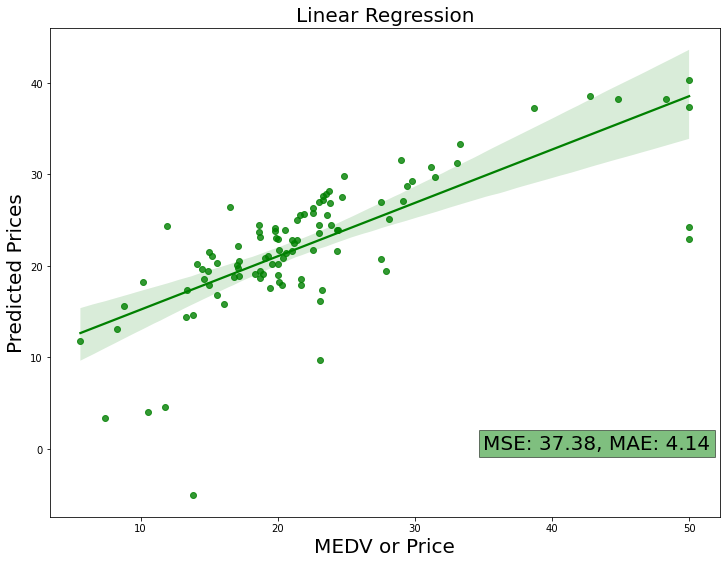

In [13]:
fig = plt.figure(figsize=(12,9))
ax = sns.regplot(Y_test, Y_pred, marker = 'o', color = 'green')
ax.set_title('Linear Regression', fontsize=20)
ax.set_xlabel('MEDV or Price', fontsize=20)
ax.set_ylabel('Predicted Prices', fontsize=20)
# Save the Linear Regrassion Plot along with Error value
plt.text(35.0, 0.0, err, fontsize=20, bbox=dict(facecolor='green', alpha=0.5))

In [14]:
# KNN algorithm Training and Predictions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(X_train, Y_train)

Y_pred = knr.predict(X_test) # Prediction

In [15]:
# Create Dataset with Testing values and Predicted Prices
print("KNN Regresson Model")
model_knn = pd.DataFrame(X_test)
model_knn['MEDV'] = Y_test
model_knn['Predicted MEDV'] = Y_pred
print(model_knn.head(10))

KNN Regresson Model
     LSTAT     RM  MEDV  Predicted MEDV
329   7.34  6.333  22.6            24.7
371   9.53  6.216  50.0            25.0
219  10.50  6.373  23.0            21.2
403  19.77  5.349   8.3            16.3
78   12.34  6.232  21.2            20.1
15    8.47  5.834  19.9            23.4
487  11.45  5.905  20.6            20.0
340   9.29  5.968  18.7            19.6
310  12.64  4.973  16.1            15.3
102  10.63  6.405  18.6            21.2


In [16]:
# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)

err = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2))
print("KNN Regression Model Performance:-- ", err)

KNN Regression Model Performance:--  MSE: 34.71, MAE: 3.73


C:\Users\Mehedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(35.0, 10.0, 'MSE: 34.71, MAE: 3.73')

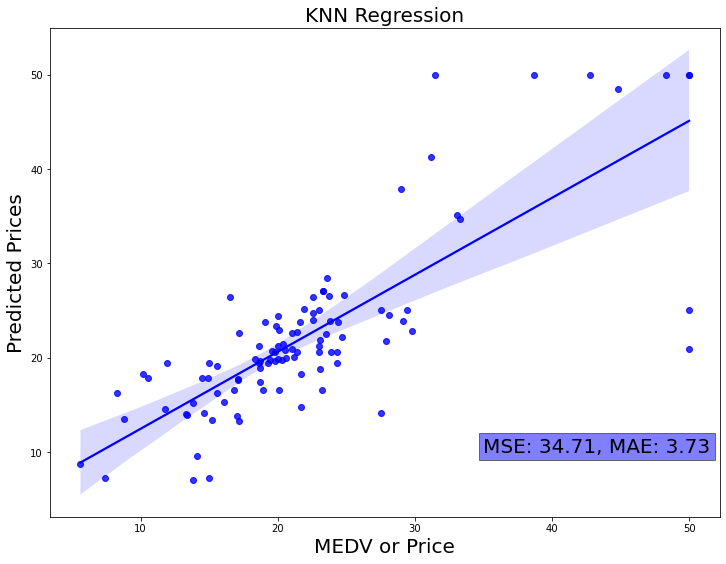

In [17]:
# Create Regression Plot for Test and Prediction values
fig = plt.figure(figsize=(12,9))
ax = sns.regplot(Y_test, Y_pred, marker = 'o', color = 'blue')
ax.set_title('KNN Regression', fontsize=20)
ax.set_xlabel('MEDV or Price', fontsize=20)
ax.set_ylabel('Predicted Prices', fontsize=20)
# Save the KNN Regrassion Plot along with Error value
plt.text(35.0, 10.0, err, fontsize=20, bbox=dict(facecolor='blue', alpha=0.5))

In [18]:
# Gradient Boosting Tree Regression
# Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

Y_pred = gbr.predict(X_test) # Predictions

In [20]:
# Create Dataset with Testing values and Predicted Prices
print("Gradient Boost Regression Model")
model_gbr = pd.DataFrame(X_test)
model_gbr['MEDV'] = Y_test
model_gbr['Predicted MEDV'] = Y_pred
print(model_gbr.head(10))

Gradient Boost Regression Model
     LSTAT     RM  MEDV  Predicted MEDV
329   7.34  6.333  22.6       24.055457
371   9.53  6.216  50.0       22.804325
219  10.50  6.373  23.0       21.337335
403  19.77  5.349   8.3       15.474126
78   12.34  6.232  21.2       20.558658
15    8.47  5.834  19.9       21.664808
487  11.45  5.905  20.6       20.541444
340   9.29  5.968  18.7       21.664808
310  12.64  4.973  16.1       21.697023
102  10.63  6.405  18.6       21.337335


In [21]:
# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)

err = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2))
print("Gradient Boosting Regression Model Performance:-- ", err)

Gradient Boosting Regression Model Performance:--  MSE: 28.05, MAE: 3.14


C:\Users\Mehedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(35.0, 10.0, 'MSE: 28.05, MAE: 3.14')

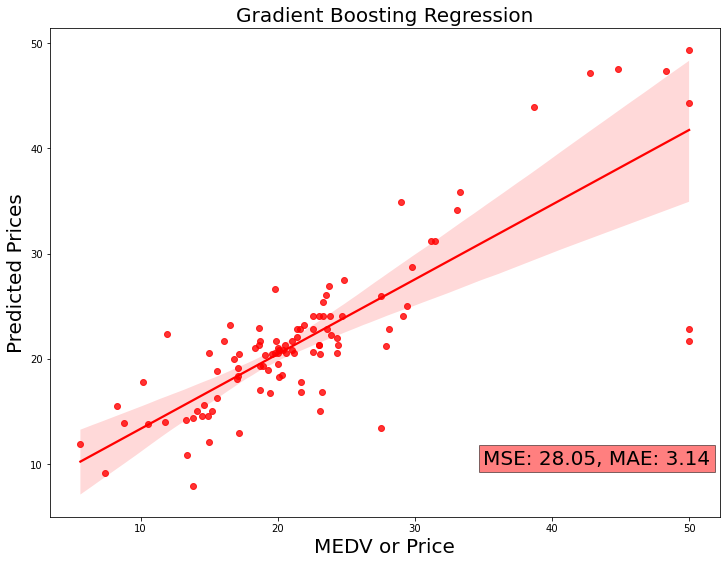

In [22]:
fig = plt.figure(figsize=(12,9))
ax = sns.regplot(Y_test, Y_pred, marker = 'o', color = 'r')
ax.set_title('Gradient Boosting Regression', fontsize=20)
ax.set_xlabel('MEDV or Price', fontsize=20)
ax.set_ylabel('Predicted Prices', fontsize=20)
# Save the KNN Regrassion Plot along with Error value
plt.text(35.0, 10.0, err, fontsize=20, bbox=dict(facecolor='r', alpha=0.5))